# CEE 690-02

# Environmental Spatial Data Analysis

# Lecture 6

# Homework #3 clarification

In problem #1 you will need to write your own function to read in the ArcASCII files into Python the "hard way". See Lecture 5 to understand what I mean by the "hard way". Solutions that use rasterio will not receive full credit for this problem. It is important to understand what is happening under the hood (at least once!).

# Possible project ideas

* Develop a new dataset by harnessing other data using the methods discussed in this course
* Build a software package for spatial analysis. 
* Use spatial analysis to answer a research question
* Many, many more...

# Key requirements for projects:

* It needs to bring together multiple topics that we covered throughout the course
* It has to be a substantial contribution (there are 4 members per team...)
* The focus must be using environmental/earth data

# Analyzing environmental data

Let's take all that we have learned over the past few weeks and do some actual science

# Output from climate models

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b1/Global_Climate_Model.png" width="600">

In [ ]:
%%html
'<iframe width="939" height="528" src="https://www.youtube.com/embed/toCFqOGVs54" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# GFDL climate model: AM4

<img src="https://www.gfdl.noaa.gov/wp-content/uploads/2018/10/air_surface_temp_cm3.jpg" width="600">

# Compare to ERA-Interim reanalysis

<img src="https://icdc.cen.uni-hamburg.de/fileadmin/_processed_/0/f/csm_ERAIN_SFC00_6H_2T_167_monmean_24bb5a1b24.png" width="400">

Assume that it counts as observations. However, know that that assumption can be a stretch. So when using these data to validate climate or weather model output always be cognizant of errors in the observations themselves. 

## Read in ERA-Interim

In [1]:
import netCDF4 as nc
#Let's read in the annual mean precipitation, wind speed, temperature, and pressure from ERA-Interim
file = '/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc_ann'
#Let's read in the annual mean precipitation, specific humidity, temperature, and pressure from ERA-Interim
fp = nc.Dataset(file)
output_era = {}
vars = ['precip','evap','t_ref','ps']
for var in vars:
    if var in ['evap','precip']:
        output_era[var] = 365*fp[var][:]
    if var == 't_ref':
        output_era['t_ref'] = 273.15 + fp['t2m'][:]
    if var == 'ps':
        output_era['ps'] = 100*fp['p_sfc'][:]
    times = fp['time']
    output_era['dates'] = nc.num2date(times[:],units=times.units,calendar=times.calendar)
fp.close()

## Make some spatial plots of ERA-Interim

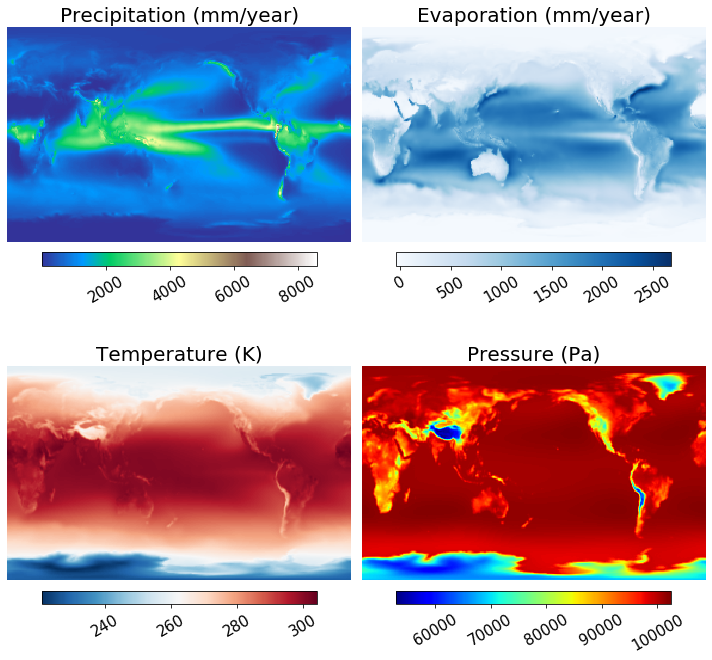

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#Let's show some basic statistics of this data (subplot,mean)
#Let's create a dictionary for colormaps
info = {'precip':{'cmap':'terrain','title':'Precipitation (mm/year)'},
        't_ref':{'cmap':'RdBu_r','title':'Temperature (K)'},
        'evap':{'cmap':'Blues','title':'Evaporation (mm/year)'},
        'ps':{'cmap':'jet','title':'Pressure (Pa)'}}
fig = plt.figure(figsize=(10,10))
for var in vars:
    plt.subplot(2,2,vars.index(var)+1)
    plt.imshow(np.flipud(np.mean(output_era[var],axis=0)),cmap=plt.get_cmap(info[var]['cmap']))
    cb = plt.colorbar(shrink=0.8,orientation='horizontal',pad=0.03)
    cb.ax.tick_params(labelsize=15,rotation=30)
    plt.title(info[var]['title'],fontsize=20)
    plt.axis('off')
fig.tight_layout()
plt.show()

## Make some time series plots of ERA-Interim

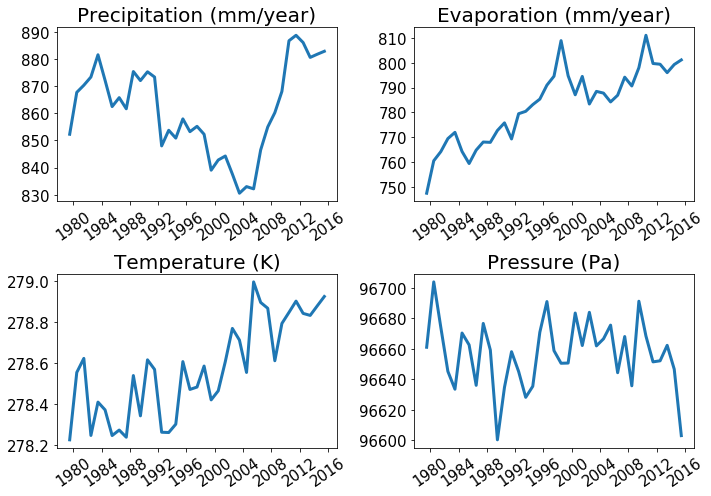

In [3]:
#Spatial mean time series
fig = plt.figure(figsize=(10,7))
for var in vars:
    plt.subplot(2,2,vars.index(var)+1)
    data = np.mean(np.mean(output_era[var],axis=1),axis=1)
    plt.plot(output_era['dates'],data,lw=3)
    plt.title(info[var]['title'],fontsize=20)
    plt.xticks(fontsize=15,rotation=35)
    plt.yticks(fontsize=15)
fig.tight_layout()
plt.show()

**Note**: The spatial averaging that we used to create the time series is actually wrong. What could be the issue?

We have to do a areal weighted average since the Earth is not flat.

## Read in GFDL AM4

In [4]:
import dateutil
#Let's read in the annual mean precipitation, specific humidity, temperature, and pressure from ERA-Interim
output_gfdl = {}
for var in vars:
    file = '/data/GFDL/atmos.1980-2014.%s.nc_ann' % var
    fp = nc.Dataset(file)
    output_gfdl[var] = fp[var][:]
    if var in ['evap','precip']:
        output_gfdl[var] = 365*24*3600*output_gfdl[var]
    times = fp['time']
    output_gfdl['dates'] = nc.num2date(times[:],units=times.units,calendar=times.calendar)
    #subtract one year from dates, error in output
    output_gfdl['dates'] = output_gfdl['dates']
    fp.close()


## Make some spatial plots of GFDL AM4

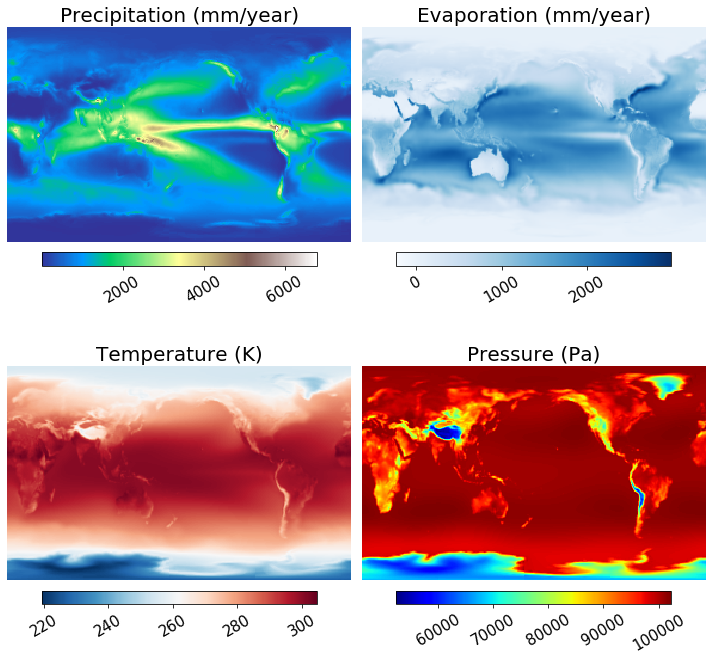

In [5]:
#Let's show some basic statistics of this data (subplot,mean)
#Let's create a dictionary for colormaps
fig = plt.figure(figsize=(10,10))
for var in vars:
    plt.subplot(2,2,vars.index(var)+1)
    plt.imshow(np.flipud(np.mean(output_gfdl[var],axis=0)),cmap=plt.get_cmap(info[var]['cmap']))
    cb = plt.colorbar(shrink=0.8,orientation='horizontal',pad=0.03)
    cb.ax.tick_params(labelsize=15,rotation=30)
    plt.title(info[var]['title'],fontsize=20)
    plt.axis('off')
fig.tight_layout()
plt.show()

## Make some time series plots of GFDL AM4

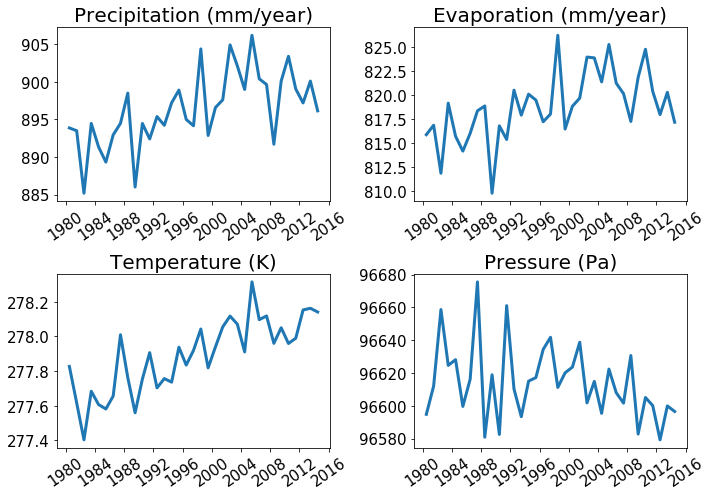

In [6]:
#Spatial mean time series
fig = plt.figure(figsize=(10,7))
for var in vars:
    plt.subplot(2,2,vars.index(var)+1)
    data = np.mean(np.mean(output_gfdl[var],axis=1),axis=1)
    plt.plot(output_gfdl['dates'],data,lw=3)
    plt.title(info[var]['title'],fontsize=20)
    plt.xticks(fontsize=15,rotation=35)
    plt.yticks(fontsize=15)
fig.tight_layout()
plt.show()

## Compare spatial plots side by side

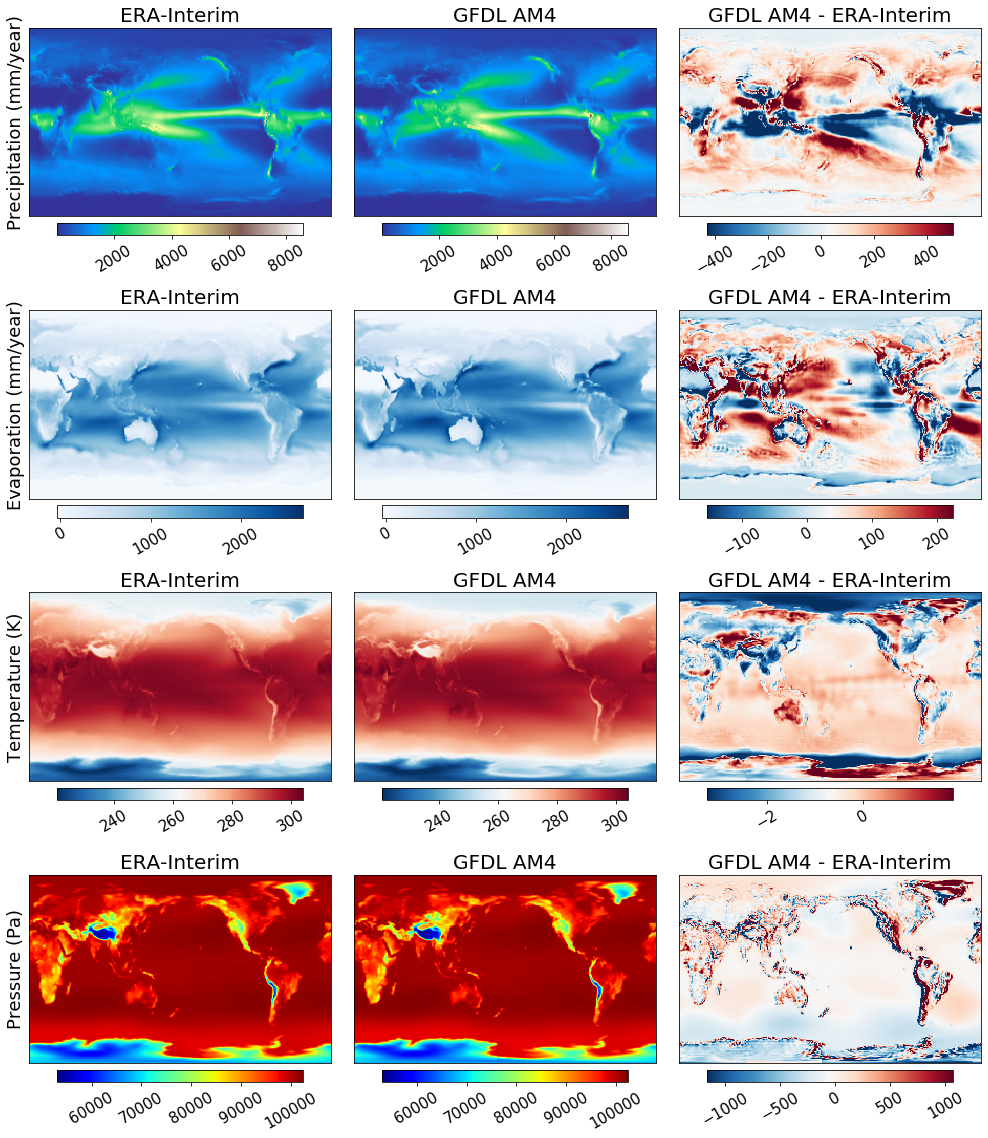

In [7]:
#Compare the maps
#Let's show some basic statistics of this data (subplot,mean)
#Let's create a dictionary for colormaps
fig = plt.figure(figsize=(14,16))
i = 0
for var in vars:
    i += 1
    plt.subplot(4,3,i)
    data1 = np.flipud(np.mean(output_era[var],axis=0))
    vmin = np.min(data1)
    vmax = np.max(data1)
    plt.imshow(data1,vmin=vmin,vmax=vmax,cmap=plt.get_cmap(info[var]['cmap']))
    plt.title('ERA-Interim',fontsize=20)
    plt.ylabel(info[var]['title'],fontsize=18)
    cb = plt.colorbar(orientation='horizontal',shrink=0.8,pad=0.03)
    cb.ax.tick_params(labelsize=15,rotation=30)
    plt.xticks([])
    plt.yticks([])
    i += 1
    plt.subplot(4,3,i)
    data2 = np.flipud(np.mean(output_gfdl[var],axis=0))
    plt.imshow(data2,vmin=vmin,vmax=vmax,cmap=plt.get_cmap(info[var]['cmap']))
    plt.title('GFDL AM4',fontsize=20)
    cb = plt.colorbar(orientation='horizontal',shrink=0.8,pad=0.03)
    cb.ax.tick_params(labelsize=15,rotation=30)
    plt.xticks([])
    plt.yticks([])
    i += 1
    plt.subplot(4,3,i)
    data = data2-data1
    vmin = np.mean(data) - 2*np.std(data)
    vmax = np.mean(data) + 2*np.std(data)
    plt.imshow(data,cmap=plt.get_cmap('RdBu_r'),vmin=vmin,vmax=vmax)
    plt.title('GFDL AM4 - ERA-Interim',fontsize=20)
    cb = plt.colorbar(orientation='horizontal',shrink=0.8,pad=0.03)
    cb.ax.tick_params(labelsize=15,rotation=30)
    plt.xticks([])
    plt.yticks([])
fig.tight_layout()
plt.show()

## Compare annual time series

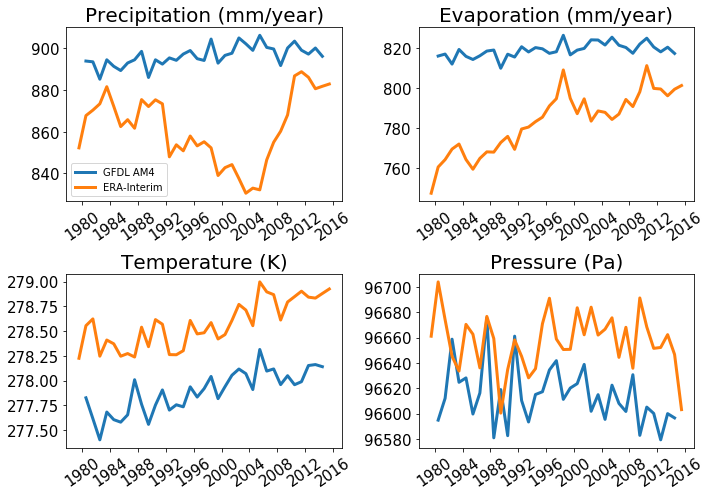

In [8]:
#Compare the time series
fig = plt.figure(figsize=(10,7))
i = 0
for var in vars:
    i += 1
    plt.subplot(2,2,i)
    data = np.mean(np.mean(output_gfdl[var],axis=1),axis=1)
    plt.plot(output_gfdl['dates'],data,lw=3)
    data = np.mean(np.mean(output_era[var],axis=1),axis=1)
    plt.plot(output_era['dates'],data,lw=3)
    plt.title(info[var]['title'],fontsize=20)
    plt.xticks(fontsize=15,rotation=35)
    plt.yticks(fontsize=15)
    if i == 1:plt.legend(['GFDL AM4','ERA-Interim'],fontsize=10)
fig.tight_layout()
plt.show()

How can we more quantitavely compare time series or spatial maps?

# Performance metrics/Statistical tests

This is not going to be exhaustive but it should give some insight into the basics of model evaluation.

## Bias

#### $bias = \frac{1}{n}\sum_i^n \left(x_i - y_i\right)$

where $x_i$ is the observation value and $y_i$ is the model value at time or location $i$.

In [9]:
def calculate_bias(x,y):
    return np.mean(x - y)

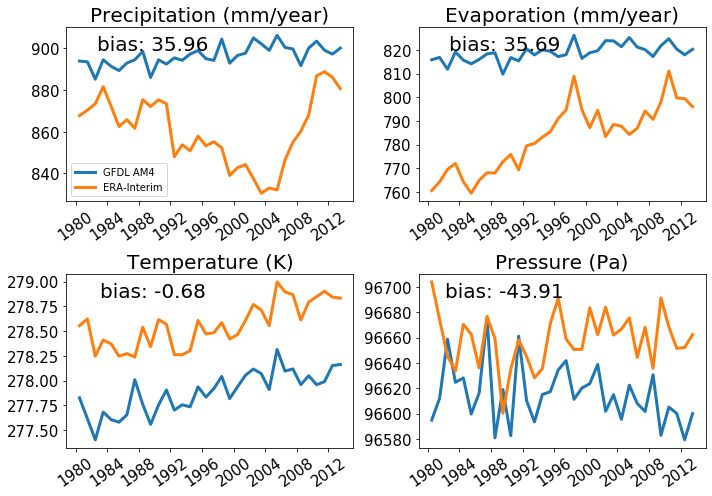

In [10]:
import datetime
dates_gfdl = output_gfdl['dates']
dates_era = output_era['dates']
m_gfdl = (dates_gfdl >= datetime.datetime(1980,1,1)) & (dates_gfdl <= datetime.datetime(2014,1,31))
m_era = (dates_era >= datetime.datetime(1980,1,1)) & (dates_era <= datetime.datetime(2014,1,31))
#Compare the time series
fig = plt.figure(figsize=(10,7))
i = 0
for var in vars:
    i += 1
    plt.subplot(2,2,i)
    data1 = np.mean(np.mean(output_gfdl[var][m_gfdl,:,:],axis=1),axis=1)
    plt.plot(output_gfdl['dates'][m_gfdl],data1,lw=3)
    data2 = np.mean(np.mean(output_era[var][m_era,:,:],axis=1),axis=1)
    plt.plot(output_era['dates'][m_era],data2,lw=3)
    plt.title(info[var]['title'],fontsize=20)
    plt.xticks(fontsize=15,rotation=35)
    plt.yticks(fontsize=15)
    #Calculate absolute bias
    metric = calculate_bias(data1,data2)
    plt.text(0.3,0.9,'bias: %.2f' % metric,horizontalalignment='center',verticalalignment='center', 
             transform=plt.gca().transAxes,fontsize=20)
    if i == 1:plt.legend(['GFDL AM4','ERA-Interim'],fontsize=10)
fig.tight_layout()
plt.show()

## Root mean squared error (RMSE)

#### $rmse = \sqrt{\frac{1}{n}\sum_i^n (x_i - y_i)^2}$

where $x_i$ is the observation value and $y_i$ is the model value at time or location $i$.

In [11]:
def calculate_rmse(x,y):
    return np.mean((x - y)**2)**0.5

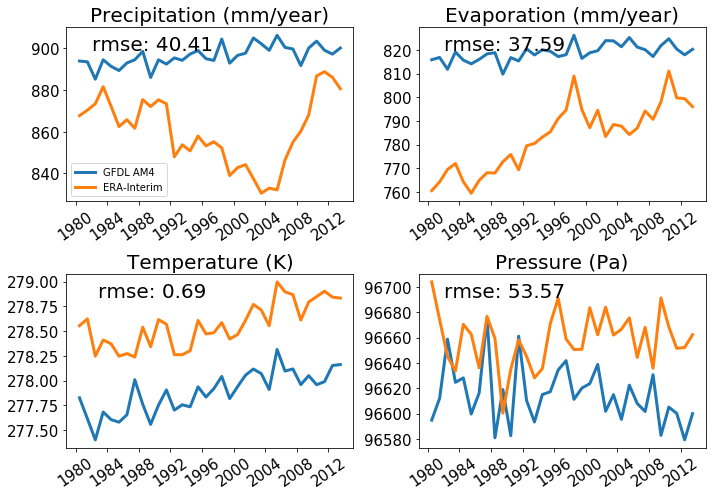

In [12]:
#Compare the time series
fig = plt.figure(figsize=(10,7))
i = 0
for var in vars:
    i += 1
    plt.subplot(2,2,i)
    data1 = np.mean(np.mean(output_gfdl[var][m_gfdl,:,:],axis=1),axis=1)
    plt.plot(output_gfdl['dates'][m_gfdl],data1,lw=3)
    data2 = np.mean(np.mean(output_era[var][m_era,:,:],axis=1),axis=1)
    plt.plot(output_era['dates'][m_era],data2,lw=3)
    plt.title(info[var]['title'],fontsize=20)
    plt.xticks(fontsize=15,rotation=35)
    plt.yticks(fontsize=15)
    #Calculate root squared mean error
    metric = calculate_rmse(data1,data2)
    plt.text(0.3,0.9,'rmse: %.2f' % metric,horizontalalignment='center',verticalalignment='center', 
             transform=plt.gca().transAxes,fontsize=20)
    if i == 1:plt.legend(['GFDL AM4','ERA-Interim'],fontsize=10)
fig.tight_layout()
plt.show()

## Linear correlation

 $\rho = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{{\sum_{i=1}^n(x_i - \bar{x})^2}}\sqrt{{\sum_{i=1}^n(y_i - \bar{y})^2}}}$

where $x_i$ is the observation value and $y_i$ is the model value at time or location $i$. $\bar{x}$ and $\bar{y}$ are the averages of the vectors $\bf{x}$ and $\bf{y}$. 

In [13]:
def calculate_rho(x,y):
    num = np.sum((x - np.mean(x))*(y - np.mean(y)))
    dem1 = np.sum((x - np.mean(x))**2)**0.5
    dem2 = np.sum((y - np.mean(y))**2)**0.5
    return num/dem1/dem2

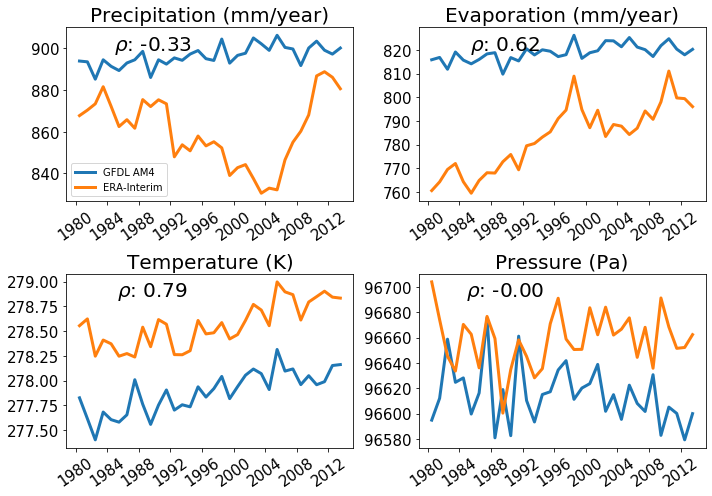

In [14]:
#Compare the time series
fig = plt.figure(figsize=(10,7))
i = 0
for var in vars:
    i += 1
    plt.subplot(2,2,i)
    data1 = np.mean(np.mean(output_gfdl[var][m_gfdl,:,:],axis=1),axis=1)
    plt.plot(output_gfdl['dates'][m_gfdl],data1,lw=3)
    data2 = np.mean(np.mean(output_era[var][m_era,:,:],axis=1),axis=1)
    plt.plot(output_era['dates'][m_era],data2,lw=3)
    plt.title(info[var]['title'],fontsize=20)
    plt.xticks(fontsize=15,rotation=35)
    plt.yticks(fontsize=15)
    #Calculate root squared mean error
    metric = calculate_rho(data1,data2)
    plt.text(0.3,0.9,r'$\rho$: %.2f' % metric,horizontalalignment='center',verticalalignment='center', 
             transform=plt.gca().transAxes,fontsize=20)
    if i == 1:plt.legend(['GFDL AM4','ERA-Interim'],fontsize=10)
fig.tight_layout()
plt.show()

There are entire books on performance metrics/statistical tests. They all have their specific purpose. Don't use a performance metric unless you understand what it means! We will cover more as we make our way through the course. 

Some metrics are simple and others are fairly involved. You could spend your time assembling a library of metrics or you could just find a Python package that already has it. 

Package for model evaluation in Python?: Scipy is the first stop

<img src="https://www.fullstackpython.com/img/logos/scipy.png" width="1000">

Scipy is a library that contains several toolboxes. 

* File input/output: **scipy.io**
* Special functions: **scipy.special**
* Linear algebra operations: **scipy.linalg**
* Interpolation: **scipy.interpolate**
* Optimization and fit: **scipy.optimize**
* Statistics and random numbers: **scipy.stats**
* Numerical integration: **scipy.integrate**
* Fast Fourier transforms: **scipy.fftpack**
* Signal processing: **scipy.signal**
* Image manipulation: **scipy.ndimage**

Source: http://scipy-lectures.org/intro/scipy.html

# scipy.stats

In [15]:
%%html
<iframe width="939" height="528" src="https://docs.scipy.org/doc/scipy/reference/stats.html" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

We are going to dig more formally intro Probability and Statistics next week. We will revisit many of these functions and probability distributions at that point.

## Revisit the Pearson correlation with Scipy

In [16]:
import scipy.stats

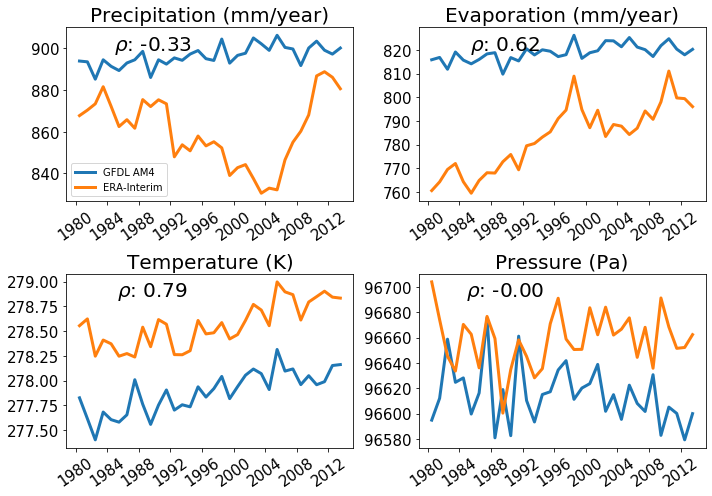

In [18]:
#Compare the time series
fig = plt.figure(figsize=(10,7))
i = 0
for var in vars:
    i += 1
    plt.subplot(2,2,i)
    data1 = np.mean(np.mean(output_gfdl[var][m_gfdl,:,:],axis=1),axis=1)
    plt.plot(output_gfdl['dates'][m_gfdl],data1,lw=3)
    data2 = np.mean(np.mean(output_era[var][m_era,:,:],axis=1),axis=1)
    plt.plot(output_era['dates'][m_era],data2,lw=3)
    plt.title(info[var]['title'],fontsize=20)
    plt.xticks(fontsize=15,rotation=35)
    plt.yticks(fontsize=15)
    #Calculate root squared mean error
    metric = scipy.stats.pearsonr(data1,data2)[0]
    plt.text(0.3,0.9,r'$\rho$: %.2f' % metric,horizontalalignment='center',verticalalignment='center', 
             transform=plt.gca().transAxes,fontsize=20)
    if i == 1:plt.legend(['GFDL AM4','ERA-Interim'],fontsize=10)
fig.tight_layout()
plt.show()

# What about Durham, NC?

In [19]:
#Let's first retrieve the ilat/ilon
file = '/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc_ann'
fp = nc.Dataset(file)
lats = fp['lat'][:]
lons = fp['lon'][:]
lat = 35.9940
lon = -78.8986
ilat = np.argmin(np.abs(lats - lat))
ilon = np.argmin(np.abs(lons - lon))

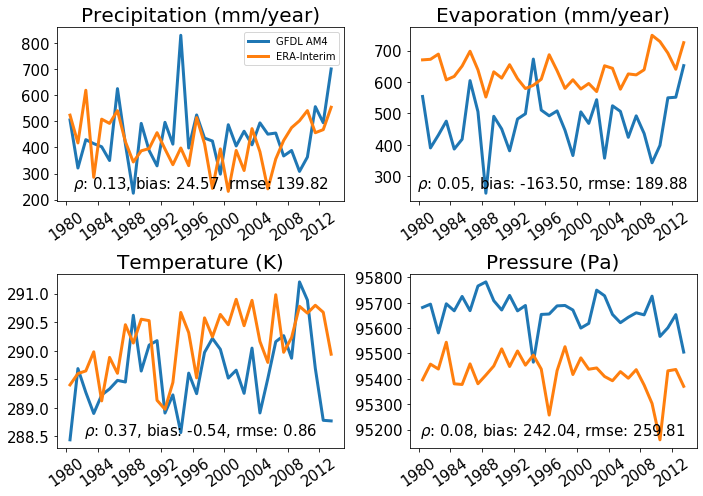

In [20]:
#Compare the time series
fig = plt.figure(figsize=(10,7))
i = 0
for var in vars:
    i += 1
    plt.subplot(2,2,i)
    data1 = output_gfdl[var][m_gfdl,ilat,ilon]
    plt.plot(output_gfdl['dates'][m_gfdl],data1,lw=3)
    data2 = output_era[var][m_era,ilat,ilon]
    plt.plot(output_era['dates'][m_era],data2,lw=3)
    plt.title(info[var]['title'],fontsize=20)
    plt.xticks(fontsize=15,rotation=35)
    plt.yticks(fontsize=15)
    #Calculate root squared mean error
    rho = scipy.stats.pearsonr(data1,data2)[0]
    bias = calculate_bias(data1,data2)
    rmse = calculate_rmse(data1,data2)
    plt.text(0.5,0.1,r'$\rho$: %.2f, bias: %.2f, rmse: %.2f' % (rho,bias,rmse),
             horizontalalignment='center',verticalalignment='center', 
             transform=plt.gca().transAxes,fontsize=15)
    if i == 1:plt.legend(['GFDL AM4','ERA-Interim'],fontsize=10)
fig.tight_layout()
plt.show()

Hint: Be skeptical of localized climate predictions... Things are improving but we still have a very long ways to go.